In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
raw_data = pd.read_table('vdjdb_full.txt')
print(raw_data.shape)
n_samples = raw_data.shape[0]
raw_data.head()

(26826, 34)


/Users/vlad/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score
0,NaN,NaN,NaN,CASSFGVSYEQYF,TRBV13-1*01,NaN,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NP52-59,spleen,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASSFGVSYEQYF"", ""cdr3_old"": ""CASSFGV...",3
1,NaN,NaN,NaN,CASSFHISYEQYF,TRBV13-1*01,NaN,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NP52-59,spleen,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASSFHISYEQYF"", ""cdr3_old"": ""CASSFHI...",3
2,NaN,NaN,NaN,CASSFGVNSDYTF,TRBV13-1*01,NaN,TRBJ1-2*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NP52-59,spleen,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASSFGVNSDYTF"", ""cdr3_old"": ""CASSFGV...",3
3,NaN,NaN,NaN,CASSLGVDAEQFF,TRBV13-1*01,NaN,TRBJ2-1*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NP52-59,spleen,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASSLGVDAEQFF"", ""cdr3_old"": ""CASSLGV...",2
4,NaN,NaN,NaN,CASSLGVGDTQYF,TRBV13-1*01,NaN,TRBJ2-5*01,MusMusculus,H-2Kb,B2M,...,NaN,NaN,NP52-59,spleen,NaN,NaN,NaN,NaN,"{""cdr3"": ""CASSLGVGDTQYF"", ""cdr3_old"": ""CASSLGV...",2


In [3]:
x = pd.notnull(raw_data.iloc[:, 0])
y = pd.notnull(raw_data.iloc[:, 3])
x1= pd.notnull(raw_data.iloc[:, 1])
y1= pd.notnull(raw_data.iloc[:, 4])
valid = [x[i] and y[i] and x1[i] and y[i] for i in range(n_samples)]

In [4]:
data_pd = raw_data.iloc[valid, [0, 1, 3, 4]].drop_duplicates()
data_pd.head()

,cdr3.alpha,v.alpha,cdr3.beta,v.beta
142,CAGNNARPMF,TRAV27*01,CASSQSPGGVAFF,TRBV14*01
143,CAGNNARLMF,TRAV27*01,CASSQSPGGVAFF,TRBV14*01
144,CAGNNARLVF,TRAV27*01,CASSQSPGGTQYF,TRBV14*01
145,CAEGFASSDGQKLLF,TRAV5*01,CASSQSPGGTQYF,TRBV14*01
146,CAGNNARLMF,TRAV27*01,CSARDRHREWLHF,TRBV20-1*01


In [5]:
data = data_pd.as_matrix()
n_samples = data.shape[0]

In [6]:
n_samples

3349

## V segment clusters

In [7]:
A_set = set()
B_set = set()
for i in range(n_samples):
    for segment in data[i, 1].split(','):
        A_set.add(segment)
    for segment in data[i, 3].split(','):
        B_set.add(segment)
n_A, n_B = len(A_set), len(B_set)
print(n_A, n_B)

137 67


In [8]:
A_list = list(A_set)
B_list = list(B_set)
anti_list_A = {i:0 for i in A_list}
for i in range(n_A):
    anti_list_A[A_list[i]] = i
anti_list_B = {i:0 for i in B_list}
for i in range(n_B):
    anti_list_B[B_list[i]] = i

In [9]:
meet_matrix = np.zeros((n_A, n_B))
for i in range(n_samples):
    for A_segment in data[i, 1].split(','):
        for B_segment in data[i, 3].split(','):
            meet_matrix[anti_list_A[A_segment], anti_list_B[B_segment]] += 1

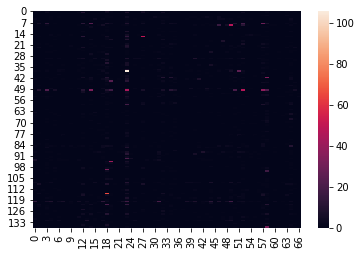

In [10]:
sns.heatmap(meet_matrix)

In [11]:
def get_score_matrix(matrix):
    score_matrix = np.zeros(matrix.shape)
    n_meetings = np.sum(matrix)
    pA = np.sum(matrix, axis = 1)
    pB = np.sum(matrix, axis = 0)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            score_matrix[i, j] = matrix[i, j] * n_meetings / (pA[i] * pB[j])
    return score_matrix
score_matrix = get_score_matrix(meet_matrix)

/Users/vlad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


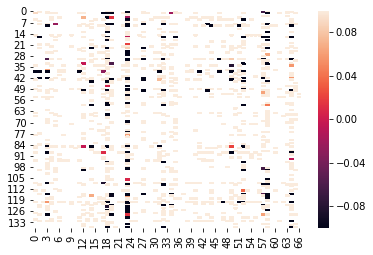

In [12]:
sns.heatmap(np.log(score_matrix))

In [13]:
pd_seq_data = pd.read_table('misc/251117.cdr12.txt')
pd_seq_data.head()

,species,gene,seqnt,seqaa,cdr1nt,cdr2nt,cdr2.5nt,cdr1aa,cdr2aa,cdr2.5aa
0,HomoSapiens,TRAV1-1*01,GGACAAAGCCTTGAGCAGCCCTCTGAAGTGACAGCTGTGGAAGGAG...,GQSLEQPSEVTAVEGAIVQINCTYQTSGFYGLSWYQQHDGGAPTFL...,ACATCTGGGTTTTATGGG,AATGCTCTGGATGGTTTG,AGTCGCTCTGATAGT,TSGFYG,NALDGL,SRSDS
1,HomoSapiens,TRAV1-2*01,GGACAAAACATTGACCAGCCCACTGAGATGACAGCTACGGAAGGTG...,GQNIDQPTEMTATEGAIVQINCTYQTSGFNGLFWYQQHAGEAPTFL...,ACATCTGGGTTCAACGGG,AATGTTCTGGATGGTTTG,AGTCGGTCTAAAGGG,TSGFNG,NVLDGL,SRSKG
2,HomoSapiens,TRAV10*01,AAAAACCAAGTGGAGCAGAGTCCTCAGTCCCTGATCATCCTGGAGG...,KNQVEQSPQSLIILEGKNCTLQCNYTVSPFSNLRWYKQDTGRGPVS...,GTGAGCCCCTTCAGCAAC,ATGACTTTCAGTGAGAACACA,GATGCAGACACAAAG,VSPFSN,MTFSENT,DADTK
3,HomoSapiens,TRAV12-1*01,CGGAAGGAGGTGGAGCAGGATCCTGGACCCTTCAATGTTCCAGAGG...,RKEVEQDPGPFNVPEGATVAFNCTYSNSASQSFFWYRQDCRKEPKL...,AACAGTGCTTCTCAGTCT,GTATACTCCAGTGGTAA,AATAGAGCCAGCCAG,NSASQS,VYSSG,NRASQ
4,HomoSapiens,TRAV12-2*01,CAGAAGGAGGTGGAGCAGAATTCTGGACCCCTCAGTGTTCCAGAGG...,QKEVEQNSGPLSVPEGAIASLNCTYSDRGSQSFFWYRQYSGKSPEL...,GACCGAGGTTCCCAGTCC,ATATACTCCAATGGTGAC,AATAAAGCCAGCCAG,DRGSQS,IYSNGD,NKASQ


In [14]:
# some sequences are lost during this step. be aware
seq_data = pd_seq_data.as_matrix()
for i in sorted(seq_data[:, 1]):
    print(i, end = ' ')

TRAV1*01 TRAV1-1*01 TRAV1-2*01 TRAV10*01 TRAV10*01 TRAV10D*01 TRAV10N*01 TRAV11*01 TRAV11D*01 TRAV12-1*01 TRAV12-1*01 TRAV12-2*01 TRAV12-2*01 TRAV12-3*01 TRAV12-3*01 TRAV12D-1*01 TRAV12D-2*01 TRAV12N-1*01 TRAV12N-2*01 TRAV12N-3*01 TRAV13-1*01 TRAV13-1*01 TRAV13-2*01 TRAV13-2*01 TRAV13-3*01 TRAV13-4/DV7*01 TRAV13-5*01 TRAV13D-1*01 TRAV13D-2*01 TRAV13D-3*01 TRAV13D-4*01 TRAV13N-1*01 TRAV13N-2*01 TRAV13N-3*01 TRAV13N-4*01 TRAV14-1*01 TRAV14-2*01 TRAV14-3*01 TRAV14/DV4*01 TRAV14D-1*01 TRAV14D-2*01 TRAV14D-3/DV8*01 TRAV14N-1*01 TRAV14N-2*01 TRAV14N-3*01 TRAV15-1/DV6-1*01 TRAV15-2/DV6-2*01 TRAV15D-1/DV6D-1*01 TRAV15D-2/DV6D-2*01 TRAV15N-1*01 TRAV15N-2*01 TRAV16*01 TRAV16*01 TRAV16D/DV11*01 TRAV16N*01 TRAV17*01 TRAV17*01 TRAV18*01 TRAV19*01 TRAV19*01 TRAV2*01 TRAV2*01 TRAV20*01 TRAV21*01 TRAV21/DV12*01 TRAV22*01 TRAV23/DV6*01 TRAV24*01 TRAV25*01 TRAV26-1*01 TRAV26-2*01 TRAV27*01 TRAV29/DV5*01 TRAV3*01 TRAV3-1*01 TRAV3-3*01 TRAV3-4*01 TRAV30*01 TRAV34*01 TRAV35*01 TRAV36/DV7*01 TRAV38-1*01 TRA

In [15]:
def cut_segment_name(name):
    if len(name) < 6:
        return name
    if name[5] >= '0' and name[5] <= '9':
        return name[:6]
    return name[:5]

In [16]:
dict_seqaa_data = {cut_segment_name(seq_data[i, 1]):seq_data[i, 3] for i in range(seq_data.shape[0])}

In [17]:
for i in sorted(dict_seqaa_data.keys()):
    print(i, end=' ')

TRAV1 TRAV10 TRAV11 TRAV12 TRAV13 TRAV14 TRAV15 TRAV16 TRAV17 TRAV18 TRAV19 TRAV2 TRAV20 TRAV21 TRAV22 TRAV23 TRAV24 TRAV25 TRAV26 TRAV27 TRAV29 TRAV3 TRAV30 TRAV34 TRAV35 TRAV36 TRAV38 TRAV39 TRAV4 TRAV40 TRAV41 TRAV5 TRAV6 TRAV7 TRAV8 TRAV9 TRBV1 TRBV10 TRBV11 TRBV12 TRBV13 TRBV14 TRBV15 TRBV16 TRBV17 TRBV18 TRBV19 TRBV2 TRBV20 TRBV21 TRBV23 TRBV24 TRBV25 TRBV26 TRBV27 TRBV28 TRBV29 TRBV3 TRBV30 TRBV31 TRBV4 TRBV5 TRBV6 TRBV7 TRBV9 TRDV1 TRDV2 TRDV3 TRDV4 TRDV5 TRGV1 TRGV2 TRGV3 TRGV4 TRGV5 TRGV6 TRGV7 TRGV8 TRGV9 

In [18]:
for i in A_list:
    if not cut_segment_name(i) in dict_seqaa_data.keys():
        print('Segment without sequence: ', i)

In [19]:
from Bio import pairwise2
from Bio.SubsMat import MatrixInfo as matlist

matrix = matlist.blosum62
gap_open = -10
gap_extend = -0.5

def seg_distance(segment1, segment2):
    seq1, seq2 = dict_seqaa_data[segment1], dict_seqaa_data[segment2]
    return pairwise2.align.globalds(seq1, seq2, matrix, gap_open, gap_extend)[0][2]

In [20]:
A_distance_matrix = np.zeros((n_A, n_A))
for i in range(n_A):
    for j in range(n_A):
        A_distance_matrix[i, j] = seg_distance(cut_segment_name(A_list[i]), 
                                               cut_segment_name(A_list[j]))
B_distance_matrix = np.zeros((n_B, n_B))
for i in range(n_B):
    for j in range(n_B):
        B_distance_matrix[i, j] = seg_distance(cut_segment_name(B_list[i]), 
                                               cut_segment_name(B_list[j]))

In [21]:
n_clusters = 10

In [22]:
from sklearn.cluster import AgglomerativeClustering

agg_cls1 = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
A_aggclusters1 = agg_cls1.fit_predict(A_distance_matrix)
B_aggclusters1 = agg_cls1.fit_predict(B_distance_matrix)

In [23]:
print('Size of Alpha clusters')
print([sum(A_aggclusters1 == i)for i in range(10)])
print('Size of Alpha clusters')
print([sum(B_aggclusters1 == i) for i in range(10)])

Size of Alpha clusters
[128, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Size of Alpha clusters
[3, 49, 3, 3, 3, 1, 1, 1, 2, 1]


In [24]:
from sklearn.cluster import AgglomerativeClustering

agg_cls2 = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
A_aggclusters2 = agg_cls2.fit_predict(A_distance_matrix)
B_aggclusters2 = agg_cls2.fit_predict(B_distance_matrix)

In [25]:
print('Size of Alpha clusters')
print([sum(A_aggclusters2 == i) for i in range(10)])
print('Size of Alpha clusters')
print([sum(B_aggclusters2 == i) for i in range(10)])

Size of Alpha clusters
[54, 15, 8, 8, 14, 5, 9, 6, 10, 8]
Size of Alpha clusters
[11, 12, 9, 7, 3, 5, 4, 8, 5, 3]


In [26]:
from sklearn.cluster import SpectralClustering

spec_cls = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
A_specclusters = spec_cls.fit_predict(A_distance_matrix)
B_specclusters = spec_cls.fit_predict(B_distance_matrix)

In [27]:
print('Size of Alpha clusters')
print([sum(A_specclusters == i) for i in range(10)])
print('Size of Alpha clusters')
print([sum(B_specclusters == i) for i in range(10)])

Size of Alpha clusters
[32, 17, 17, 12, 10, 10, 9, 9, 13, 8]
Size of Alpha clusters
[7, 7, 4, 12, 8, 9, 6, 4, 2, 8]


## Exporting clustering data

In [28]:
def factor_matrix(x_clustering, y_clustering, matrix):
    new_matrix = np.zeros((max(x_clustering) + 1, max(y_clustering) + 1))
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            new_matrix[x_clustering[i], y_clustering[j]] += matrix[i, j]
    return new_matrix

### Spectral clustering

In [29]:
A_clusters = A_specclusters
B_clusters = B_specclusters

In [30]:
factorized_meet_matrix = factor_matrix(A_clusters, B_clusters, meet_matrix)
factorized_score_matrix = get_score_matrix(factorized_meet_matrix)

/Users/vlad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


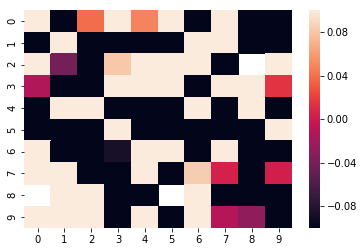

In [31]:
sns.heatmap(np.log(factorized_score_matrix))

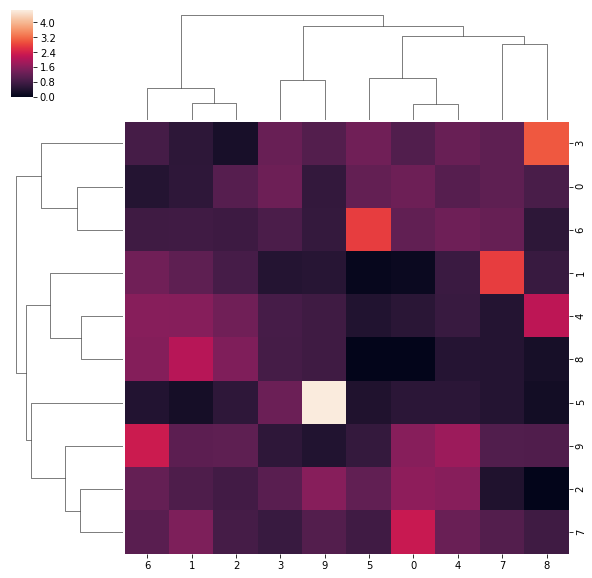

In [32]:
# this method doens't work with log(0) =(((
sns.clustermap(factorized_score_matrix, metric="correlation")

In [33]:
pd_spec_alpha_clusters = pd.DataFrame(np.array([A_list, A_clusters]).T, columns=['segment', 'cluster'])
pd_spec_beta_clusters = pd.DataFrame(np.array([B_list, B_clusters]).T, columns=['segment', 'cluster'])

### Agglomerative clustering

In [34]:
A_clusters = A_aggclusters2
B_clusters = B_aggclusters2

In [35]:
factorized_meet_matrix = factor_matrix(A_clusters, B_clusters, meet_matrix)
factorized_score_matrix = get_score_matrix(factorized_meet_matrix)

/Users/vlad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


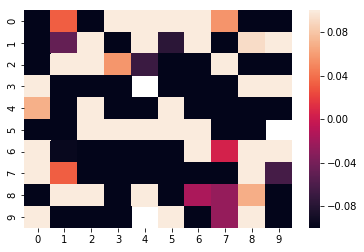

In [36]:
sns.heatmap(np.log(factorized_score_matrix))

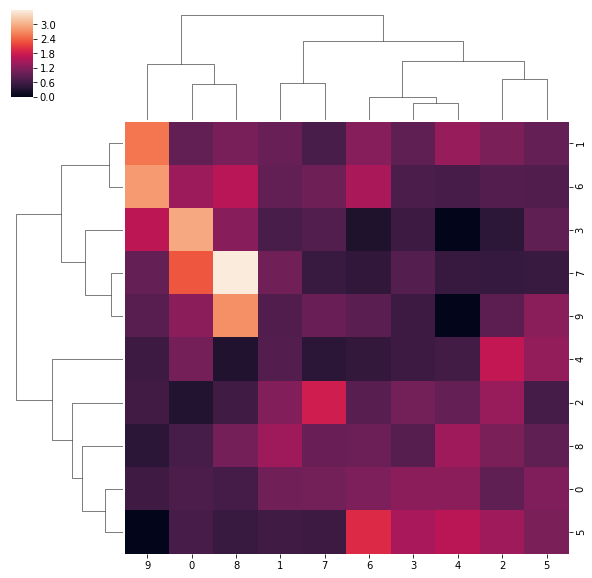

In [37]:
# this method doens't work with log(0) =(((
sns.clustermap(factorized_score_matrix, metric="correlation")

Segment names and clusters, they belong to

In [38]:
pd_agg2_alpha_clusters = pd.DataFrame(np.array([A_list, A_clusters]).T, columns=['segment', 'cluster'])
pd_agg2_beta_clusters = pd.DataFrame(np.array([B_list, B_clusters]).T, columns=['segment', 'cluster'])

In [39]:
# pd_alpha_clusters.to_csv("Valpha_clusters.csv", index_label='Id')
# pd_beta_clusters.to_csv("Vbeta_clusters.csv", index_label='Id')

In [40]:
dict_spec_alpha_clusters = {pd_spec_alpha_clusters.iloc[i, 0]:pd_spec_alpha_clusters.iloc[i, 1] for i in range(pd_spec_alpha_clusters.shape[0])}
dict_spec_beta_clusters = {pd_spec_beta_clusters.iloc[i, 0]:pd_spec_beta_clusters.iloc[i, 1] for i in range(pd_spec_beta_clusters.shape[0])}
dict_agg2_alpha_clusters = {pd_agg2_alpha_clusters.iloc[i, 0]:pd_agg2_alpha_clusters.iloc[i, 1] for i in range(pd_agg2_alpha_clusters.shape[0])}
dict_agg2_beta_clusters = {pd_agg2_beta_clusters.iloc[i, 0]:pd_agg2_beta_clusters.iloc[i, 1] for i in range(pd_agg2_beta_clusters.shape[0])}

In [41]:
Va_index = 1
Vb_index = 3

In [42]:
alpha_spec_V_segment = np.array([cut_segment_name(dict_spec_alpha_clusters[v.split(',')[0]]) for v in data[:, Va_index]])
beta_spec_V_segment = np.array([cut_segment_name(dict_spec_beta_clusters[v.split(',')[0]]) for v in data[:, Vb_index]])
alpha_agg2_V_segment = np.array([cut_segment_name(dict_agg2_alpha_clusters[v.split(',')[0]]) for v in data[:, Va_index]])
beta_agg2_V_segment = np.array([cut_segment_name(dict_agg2_beta_clusters[v.split(',')[0]]) for v in data[:, Vb_index]])

In [43]:
V_segments = pd.DataFrame(np.array([alpha_spec_V_segment, beta_spec_V_segment, 
                                     alpha_agg2_V_segment, beta_agg2_V_segment]).T, 
                           columns=['alpha_spec', 'beta_spec', 'alpha_agg2', 'beta_agg2'])

In [44]:
V_segments.shape

(3349, 4)

## Kidera factors

In [59]:
a_index = 0
b_index = 2
n_features = 27
n_bines = 10
n_clusters = 10

In [46]:
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
aa2num_table = {aa[i]:i for i in range(20)}

def aa2num(aa):
    return aa2num_table[aa]

def protein2array(protein):
    return np.array([aa2num(aa) for aa in protein])

In [47]:
dict_kidera = {}
dict_kidera['A'] = [-1.56, -1.67, -0.97, -0.27, -0.93, -0.78, -0.2, -0.08, 0.21, -0.48]
dict_kidera['R'] = [0.22, 1.27, 1.37, 1.87, -1.7, 0.46, 0.92, -0.39, 0.23, 0.93]
dict_kidera['N'] = [1.14, -0.07, -0.12, 0.81, 0.18, 0.37, -0.09, 1.23, 1.1, -1.73]
dict_kidera['D'] = [0.58, -0.22, -1.58, 0.81, -0.92, 0.15, -1.52, 0.47, 0.76, 0.7]
dict_kidera['C'] = [0.12, -0.89, 0.45, -1.05, -0.71, 2.41, 1.52, -0.69, 1.13, 1.1]
dict_kidera['Q'] = [-0.47, 0.24, 0.07, 1.1, 1.1, 0.59, 0.84, -0.71, -0.03, -2.33]
dict_kidera['E'] = [-1.45, 0.19, -1.61, 1.17, -1.31, 0.4, 0.04, 0.38, -0.35, -0.12]
dict_kidera['G'] = [1.46, -1.96, -0.23, -0.16, 0.1, -0.11, 1.32, 2.36, -1.66, 0.46]
dict_kidera['H'] = [-0.41, 0.52, -0.28, 0.28, 1.61, 1.01, -1.85, 0.47, 1.13, 1.63]
dict_kidera['I'] = [-0.73, -0.16, 1.79, -0.77, -0.54, 0.03, -0.83, 0.51, 0.66, -1.78]
dict_kidera['L'] = [-1.04, 0, -0.24, -1.1, -0.55, -2.05, 0.96, -0.76, 0.45, 0.93]
dict_kidera['K'] = [-0.34, 0.82, -0.23, 1.7, 1.54, -1.62, 1.15, -0.08, -0.48, 0.6]
dict_kidera['M'] = [-1.4, 0.18, -0.42, -0.73, 2, 1.52, 0.26, 0.11, -1.27, 0.27]
dict_kidera['F'] = [-0.21, 0.98, -0.36, -1.43, 0.22, -0.81, 0.67, 1.1, 1.71, -0.44]
dict_kidera['P'] = [2.06, -0.33, -1.15, -0.75, 0.88, -0.45, 0.3, -2.3, 0.74, -0.28]
dict_kidera['S'] = [0.81, -1.08, 0.16, 0.42, -0.21, -0.43, -1.89, -1.15, -0.97, -0.23]
dict_kidera['T'] = [0.26, -0.7, 1.21, 0.63, -0.1, 0.21, 0.24, -1.15, -0.56, 0.19]
dict_kidera['W'] = [0.3, 2.1, -0.72, -1.57, -1.16, 0.57, -0.48, -0.4, -2.3, -0.6]
dict_kidera['Y'] = [1.38, 1.48, 0.8, -0.56, 0, -0.68, -0.31, 1.03, -0.05, 0.53]
dict_kidera['V'] = [-0.74, -0.71, 2.04, -0.4, 0.5, -0.81, -1.07, 0.06, -0.46, 0.65]

kidera = np.zeros((20, 10))
for i in range(20):
    kidera[i, :] = dict_kidera[aa[i]]

In [48]:
alpha_letters = np.zeros((n_samples, 20))
alpha_mean_kidera = np.zeros((n_samples, 10))
alpha_std_kidera = np.zeros((n_samples, 10))
alpha_shift_kidera = np.zeros((n_samples, 10))

for i in range(n_samples):
    array = protein2array(data[i, a_index])
    for aa in array:
        alpha_letters[i, aa] += 1
    properties = kidera[array, :]
    alpha_mean_kidera[i, :] = np.mean(properties, axis=0)
    alpha_std_kidera[i, :] = np.std(properties, axis=0)
    alpha_shift_kidera[i, :] = np.dot(properties.T, np.linspace(-1., 1., properties.shape[0]))

In [49]:
beta_letters = np.zeros((n_samples, 20))
beta_mean_kidera = np.zeros((n_samples, 10))
beta_std_kidera = np.zeros((n_samples, 10))
beta_shift_kidera = np.zeros((n_samples, 10))

for i in range(n_samples):
    array = protein2array(data[i, b_index])
    for aa in array:
        beta_letters[i, aa] += 1
    properties = kidera[array, :]
    beta_mean_kidera[i, :] = np.mean(properties, axis=0)
    beta_std_kidera[i, :] = np.std(properties, axis=0)
    beta_shift_kidera[i, :] = np.dot(properties.T, np.linspace(-1., 1., properties.shape[0]))

In [50]:
def letters(protein):
    counter = np.zeros((20,), dtype = int)
    for l in protein:
        counter[aa2num[l]] += 1
    return counter

def shift_prop(protein, dictionary):
    prop = prop_array(protein, dictionary)
    return np.array([np.dot(prop[:, i], np.linspace(-1., 1., prop.shape[0])) for i in range(10)], dtype='float')

In [51]:
alpha_length = np.array([len(protein) for protein in data[:, 0]])
beta_length = np.array([len(protein) for protein in data[:, 1]])

In [52]:
def QuantileBins(array, n_bines=n_bines):
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(array.shape[0])
    return ranks * n_bines // array.shape[0]

def MinMaxBins(array, n_bines=n_bines):
    min_, max_ = min(array), max(array)
    return (array - min_) * n_bines // (max_ - min_)

In [82]:
alpha_mean_kidera_classes = np.zeros((n_samples, 10), dtype=int)
beta_mean_kidera_classes = np.zeros((n_samples, 10), dtype=int)

for i in range(10):
    #alpha_mean_kidera_classes[:, i] = QuantileBins(alpha_mean_kidera[:, i])
    #beta_mean_kidera_classes[:, i] = QuantileBins(beta_mean_kidera[:, i])
    alpha_mean_kidera_classes[:, i] = MinMaxBins(alpha_mean_kidera[:, i])
    beta_mean_kidera_classes[:, i] = MinMaxBins(beta_mean_kidera[:, i])

alpha_length_bin = MinMaxBins(alpha_length)
beta_length_bin = MinMaxBins(beta_length)

## Data Merge

In [83]:
A = np.concatenate([alpha_length_bin.reshape((n_samples, 1)), 
                    V_segments.iloc[:, [0, 2]], 
                    alpha_mean_kidera_classes], 
                   axis=1)

B = np.concatenate([beta_length_bin.reshape((n_samples, 1)), 
                    V_segments.iloc[:, [1, 3]], 
                    beta_mean_kidera_classes], 
                   axis=1)

In [84]:
Bp = np.random.permutation(B)
AB = np.concatenate([A, B], axis=1)
ABp = np.concatenate([A,Bp], axis=1)

In [85]:
bayes_columns=['a_length_bin', 'a_V_segment_spec', 'a_V_segment_agg'] + ['a_kidera'+str(i+1) for i in range(10)]  +\
              ['b_length_bin', 'b_V_segment_spec', 'b_V_segment_agg'] + ['b_kidera'+str(i+1) for i in range(10)]  +\
              ['are_paired']

In [86]:
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits = 1, test_size = 0.33)
train_index, test_index = next(rs.split(alpha_mean_kidera))

def GetShufflingDataSplit(alpha, beta, train_index=train_index, test_index=test_index):
    A_train, A_test = alpha[train_index], alpha[test_index]
    B_train, B_test = beta[train_index], beta[test_index]
    Bp_train, Bp_test = np.random.permutation(B_train), np.random.permutation(B_test)
    
    Xn_train = np.concatenate([A_train, B_train], axis = 1)
    Xp_train = np.concatenate([A_train, Bp_train], axis = 1)
    Xn_test = np.concatenate([A_test, B_test], axis = 1)
    Xp_test = np.concatenate([A_test, Bp_test], axis = 1)

    X_train = np.concatenate([Xn_train, Xp_train], axis = 0)
    X_test = np.concatenate([Xn_test, Xp_test], axis = 0)
    y_train, y_test = np.zeros((2 * len(train_index), 2)), np.zeros((2 * len(test_index), 2))
    for i in range(len(train_index)):
        y_train[i, 1] = 1
        y_train[i + len(train_index), 0] = 1
    for i in range(len(test_index)):
        y_test[i, 1] = 1
        y_test[i + len(test_index), 0] = 1
    return X_train, y_train, X_test, y_test

In [87]:
X_train, y_train, X_test, y_test = GetShufflingDataSplit(A, B)

bayes_train_table = np.zeros((X_train.shape[0], n_features))
bayes_train_table[:, :-1] = X_train
bayes_train_table[:, -1] = y_train[:, 1]

bayes_test_table = np.zeros((X_test.shape[0], n_features))
bayes_test_table[:, :-1] = X_test
bayes_test_table[:, -1] = y_test[:, 1]

## Export

In [88]:
pd.DataFrame(bayes_train_table, columns=bayes_columns).to_csv("vdjdb_mm_train_bayes.csv")
pd.DataFrame(bayes_test_table, columns=bayes_columns).to_csv("vdjdb_mm_test_bayes.csv")

In [81]:
#pd.DataFrame(bayes_train_table, columns=bayes_columns).to_csv("vdjdb_q_train_bayes.csv")
#pd.DataFrame(bayes_test_table, columns=bayes_columns).to_csv("vdjdb_q_test_bayes.csv")

## Result

bins:min,max

bnlearn method:tabu

<img src="files/vdjdb_mm_tabu.pdf", width=1500>

bins:min,max

bnlearn method:hc

<img src="files/vdjdb_mm_hc.pdf", width=1500>

bins:quantile

bnlearn method:hc

<img src="files/vdjdb_q_hc.pdf", width=1500>

bins:quantile

bnlearn method:tabu

<img src="files/vdjdb_q_tabu.pdf", width=1500>

All methods show that length of beta chain is correlated to cluster of V segment in spectral clustering